# KPMG Virtual Data Analytics Internship

## Problem scenerio

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.



### Task 2:  Data Quality Assessment for Existing Customers

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")

# Merge the dataset within one sheet

# First read the data set into a seperate dataframes 
demographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',skiprows=1)
cust_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',skiprows=1)
transanction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions',skiprows=1)
new_cust_list = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',skiprows=1)

# Merge the dataset in one dataframe for further analysis
df= pd.merge(demographic, transanction, on = 'customer_id')
df= pd.merge(df,cust_address, on = 'customer_id')
df

### Data Exploration 

In [87]:
# Dataframe dimension (rows, columns)

df.shape

(19968, 30)

In [88]:
# Data Profiling (i.e. data types, non null values and columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19326 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19522 non-null  datetime64[ns]
 6   job_title                            17589 non-null  object        
 7   job_industry_category                16746 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  object        
 10  default   

In [89]:
# Checking any duplicate values in the datset

df.duplicated().sum()  # No duplicate values

0

In [90]:
# Null values in the datset

df.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                                1451
owns_car                                  0
tenure                                  446
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                      

In the demographic sheet their are multiple column having missing dataset i.e last name, DOB, job title, job_industry_category,  job_industry_category,  default, tenure,  online_order,  product_class and product_size etc.

In [91]:
# Check unique values in each columns;

df.nunique()

customer_id                             3489
first_name                              2835
last_name                               3263
gender                                     6
past_3_years_bike_related_purchases      100
DOB                                     3047
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
default                                   90
owns_car                                   2
tenure                                    22
transaction_id                         19968
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price

In [92]:
# Explore the columns

df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [93]:
# Checking Gender categories

df['gender'].value_counts()

Female    9979
Male      9510
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

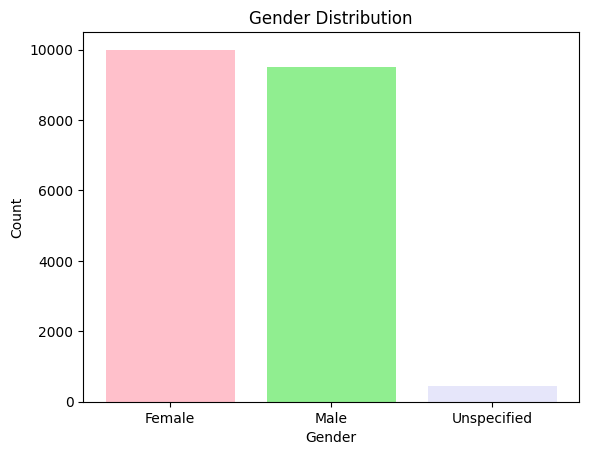

In [94]:
# Replace the categorical values

df['gender'].replace('M', 'Male', inplace=True)
df['gender'].replace('F', 'Female', inplace=True)
df['gender'].replace('Femal', 'Female', inplace=True)
df['gender'].replace('U', 'Unspecified', inplace=True)

gender_counts = df['gender'].value_counts()

# Plotting the gender counts with color
plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'lightgreen', 'lavender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.show()


In [96]:
# Checking DOB column for any ages above 100

# Get the current date
current_date = datetime.now()       

# Calculate the age by subtracting the DOB from the current date
df['age'] = (current_date - df['DOB']) / pd.Timedelta(days=365.25)

# Filter rows where age is greater than 100
age_greater_than_100 = df[df['age'] > 100]

# print age greater than 100
age_greater_than_100

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation,age
171,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,small,1703.52,1516.13,40649.0,833 Luster Way,4005,QLD,Australia,8,179.437368
172,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,958.74,748.90,38693.0,833 Luster Way,4005,QLD,Australia,8,179.437368
173,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,large,2083.94,675.03,41533.0,833 Luster Way,4005,QLD,Australia,8,179.437368
174,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,1231.15,161.60,38216.0,833 Luster Way,4005,QLD,Australia,8,179.437368
175,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,small,1977.36,1759.85,40779.0,833 Luster Way,4005,QLD,Australia,8,179.437368
176,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,1163.89,589.27,42560.0,833 Luster Way,4005,QLD,Australia,8,179.437368
177,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,NaN,1034.17,NaN,NaN,833 Luster Way,4005,QLD,Australia,8,179.437368
178,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,small,1172.78,1043.77,37539.0,833 Luster Way,4005,QLD,Australia,8,179.437368
179,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,...,medium,1807.45,778.69,42145.0,833 Luster Way,4005,QLD,Australia,8,179.437368


Here, we have one customers with customer id =34, having age more than 100, which is practically impossible. Thus, we need drop it.

In [97]:
# Drop rows where customer ID = 34
customer_id = 34

# Drop rows with customer ID 34
df = df.drop(df[df['customer_id'] == customer_id].index)

In [98]:
# Checking job_title 

df['job_title'].value_counts()


Social Worker                           226
Business Systems Development Analyst    221
Assistant Professor                     212
Legal Assistant                         212
Executive Secretary                     208
                                       ... 
Administrative Assistant I               15
Health Coach III                         14
Geologist II                             11
Research Assistant III                    9
Developer I                               7
Name: job_title, Length: 195, dtype: int64

It seems like more of the individula work as a Social Worker, Business analyst, Assistant Professor,Legal Assistant, Executive secretary are some of the prime users.

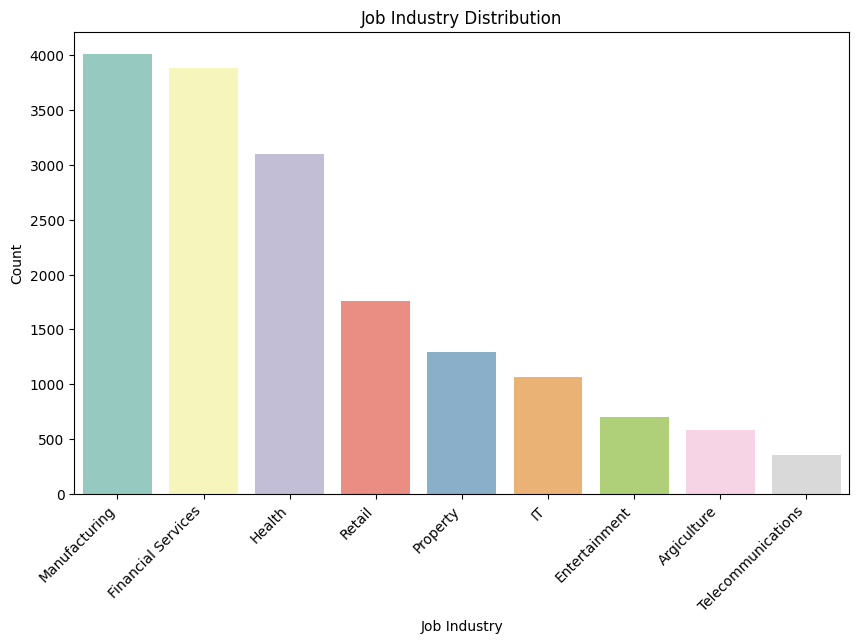

In [99]:
# Checking top customers job category
job_industry_category = df['job_industry_category'].value_counts()

# Sort the counts in descending order
job_industry_category = job_industry_category.sort_values(ascending=False)

# Plotting the Job Industry counts with color using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='job_industry_category', data=df, order=job_industry_category.index, palette='Set3')
plt.xlabel('Job Industry')
plt.ylabel('Count')
plt.title('Job Industry Distribution')

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.show()

It seems like more of the individula work for Manufacturing, Financial Services & Health are the prime users followed by Retail, Property & IT domain. 

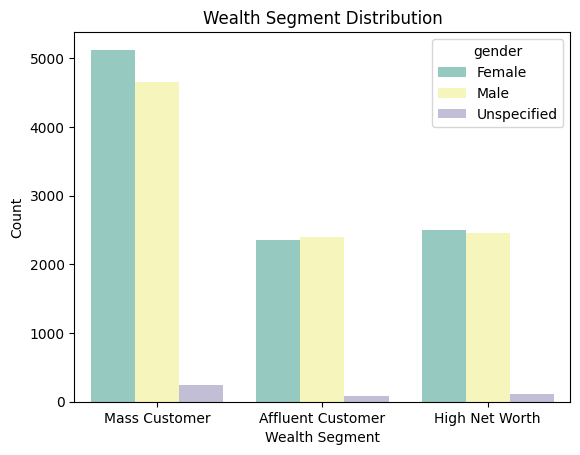

In [130]:
# Checking wealth_segment
wealth_segment = df['wealth_segment'].value_counts()

# Plotting the wealth segment counts with hue
sns.countplot(x='wealth_segment', data=df, hue='gender', palette='Set3')
plt.xlabel('Wealth Segment')
plt.ylabel('Count')
plt.title('Wealth Segment Distribution')

plt.show()


In [101]:
# Dropping default column

df['default'].value_counts()
df = df.drop('default', axis=1)

This default column is of no importance and can be deleted.

In [102]:
# Checking deceased_indicator 

df['deceased_indicator'].value_counts()

N    19951
Y        8
Name: deceased_indicator, dtype: int64

We have two deceased customer

In [103]:
# Checking owns_car 

df['owns_car'].value_counts()

Yes    10042
No      9917
Name: owns_car, dtype: int64

Looks like we have equal number of customers who has a car and who doesnt have a car.

In [104]:
# Checking tenure 

df['tenure'].value_counts()


7.0     1190
5.0     1096
11.0    1088
16.0    1067
12.0    1060
8.0     1032
14.0    1019
9.0      995
17.0     985
10.0     985
13.0     973
18.0     959
6.0      953
4.0      929
15.0     908
1.0      869
19.0     837
3.0      819
2.0      736
20.0     483
21.0     275
22.0     255
Name: tenure, dtype: int64

In [105]:
df['product_line'].value_counts()

Standard    14151
Road         3961
Touring      1233
Mountain      420
Name: product_line, dtype: int64

In [106]:
# Checking Product class

df['product_class'].value_counts()

medium    13797
high       3011
low        2957
Name: product_class, dtype: int64

<Figure size 1000x600 with 0 Axes>

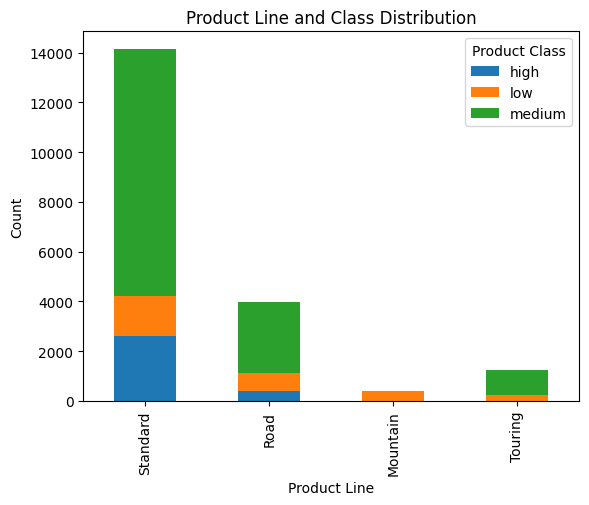

In [107]:
# Grouping data by product line and product class and getting their counts
product_line_class_counts = df.groupby(['product_line', 'product_class']).size().unstack().fillna(0)

# Sort the counts in descending order
product_line_class_counts = product_line_class_counts.sort_values(by=product_line_class_counts.columns.tolist(), ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
product_line_class_counts.plot(kind='bar', stacked=True)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Product Line and Class Distribution')
plt.legend(title='Product Class')

plt.show()


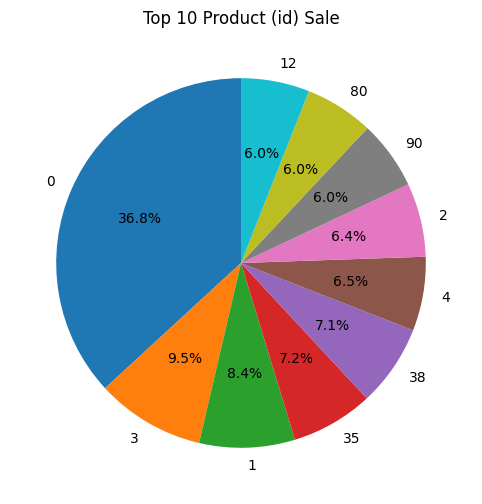

In [108]:
# Checking Top 10 Product ID
top_10_product_id = df['product_id'].value_counts().nlargest(10)

# Plotting the top 10 Product ID counts using Seaborn
plt.figure(figsize=(8, 6))
plt.pie(top_10_product_id.values, labels=top_10_product_id.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Product (id) Sale')

plt.show()


In [109]:
# Checking States
df['state'].value_counts()

NSW                10200
VIC                 4541
QLD                 4253
New South Wales      485
Victoria             480
Name: state, dtype: int64

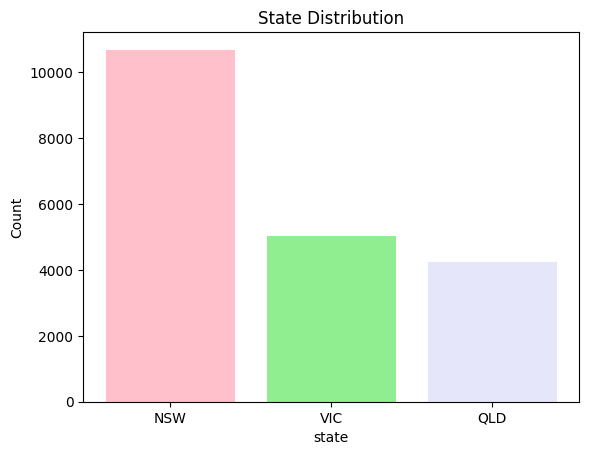

In [110]:
# Replace the categorical values
df['state'].replace('New South Wales', 'NSW', inplace=True)
df['state'].replace('Victoria', 'VIC', inplace=True)

state = df['state'].value_counts()

# Plotting the gender counts with color
plt.bar(state.index, state.values, color=['pink', 'lightgreen', 'lavender'])
plt.xlabel('state')
plt.ylabel('Count')
plt.title('State Distribution')

plt.show()


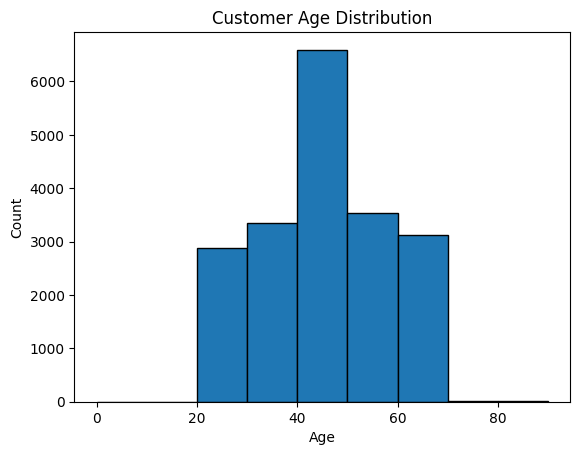

In [111]:
# Visualize the age groups

# Binning the age values
bin_edges = range(0, 100, 10)  # Define the bin edges (0, 10, 20, ..., 100)
plt.hist(df['age'], bins=bin_edges, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customer Age Distribution')

plt.show()

Most of the customer age group are 40-50

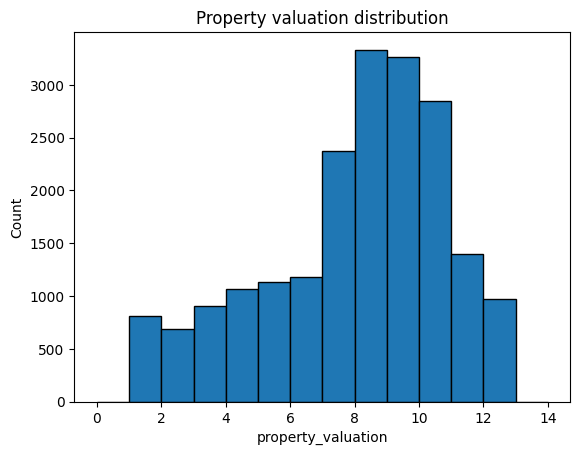

In [112]:
# Visualize the Property valuation

# Binning the age values
bin_edges = range(0, 15, 1) 
plt.hist(df['property_valuation'], bins=bin_edges, edgecolor='black')

# Set labels and title
plt.xlabel('property_valuation')
plt.ylabel('Count')
plt.title('Property valuation distribution')

Respective customers having a property valuation range from 7.5 to 10.5 are mostly using the product

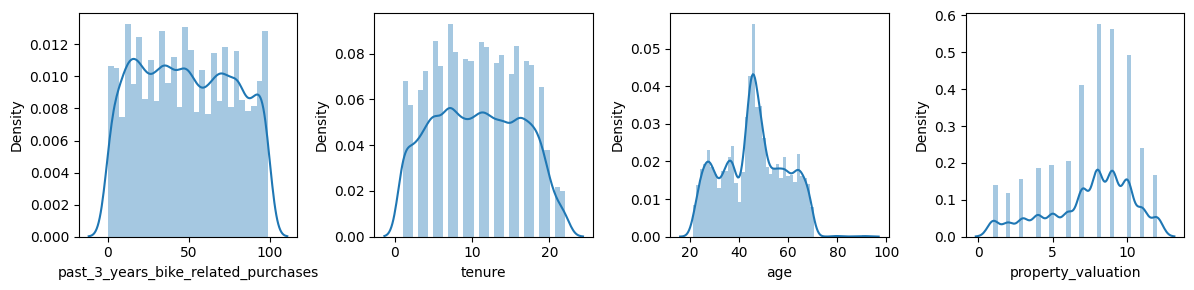

In [113]:
# looking for distribution
nums = ['past_3_years_bike_related_purchases', 'tenure', 'age', 'property_valuation']
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

In [131]:
# Transaction analysis: 

# making backup dataset
df_transact = df.copy()

# deeper analysis of datetime data by breaking it down into more specific parts
df_transact['transaction_year'] = df['transaction_date'].dt.strftime('%Y')
df_transact['transaction_month'] = df['transaction_date'].dt.strftime('%B')
df_transact['transaction_quarter'] = df['transaction_date'].dt.quarter.astype(str)
df_transact['transaction_day'] = df['transaction_date'].dt.strftime('%d')
df_transact['transaction_weekday'] = df['transaction_date'].dt.strftime('%A')
df_transact.drop(['transaction_date'],axis=1,inplace=True)

# aggregate by month
transaction_per_month = df_transact.groupby(['transaction_month'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month


,month,number_of_transaction
4,January,1679
3,February,1620
7,March,1652
0,April,1650
8,May,1683
6,June,1578
5,July,1713
1,August,1745
11,September,1565
10,October,1768


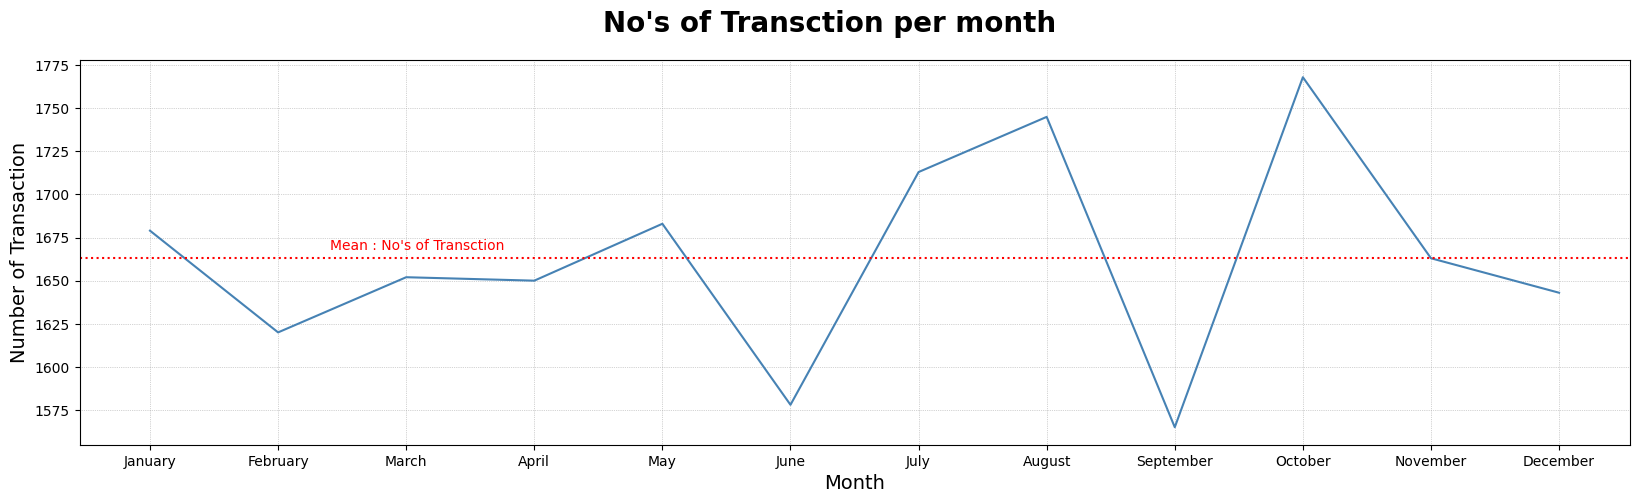

In [120]:
# visualization transanctions overtime.
fig = plt.figure(figsize=(20, 5))

fig.suptitle('No\'s of Transction per month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Transaction', fontsize=14)

x = transaction_per_month['month']
y = transaction_per_month['number_of_transaction']
mean = y.mean()

plt.plot(x, y, color = 'steelblue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean : No\'s of Transction', transform=fig.transFigure, color='red')
plt.show()

In [121]:
# Checking product details

stat = df[['brand', 'product_line', 'product_class', 'product_size']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

,count,unique,top,freq,% top
brand,19765,6,Solex,4245,21.477359
product_line,19765,4,Standard,14151,71.596256
product_class,19765,3,medium,13797,69.805211
product_size,19765,3,medium,12965,65.59575


Customers predominantly purchased Solex, accounting for 21.43% of all purchases.

The majority of customers, comprising 71.59%, opted for Standard bikes.

A significant proportion of customers, accounting for 69.84%, purchased medium class bikes.

Approximately 65.68% of customers opted for medium size bikes.

In [122]:
# Brand Analysis
brand = df['brand'].value_counts().reset_index()
brand.columns = ['brand', 'count']
brand['percentage'] = (brand['count']/brand['count'].sum()*100).round(2)
brand

,brand,count,percentage
0,Solex,4245,21.48
1,Giant Bicycles,3307,16.73
2,WeareA2B,3287,16.63
3,OHM Cycles,3039,15.38
4,Trek Bicycles,2983,15.09
5,Norco Bicycles,2904,14.69


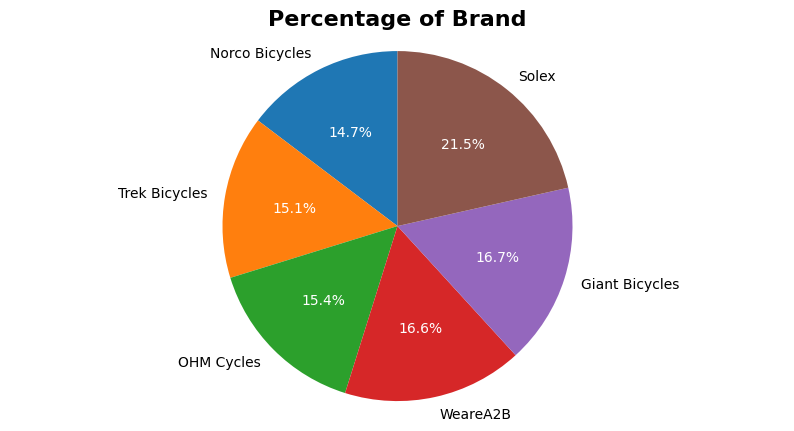

In [129]:
# visualizing brand 

fig, ax = plt.subplots(figsize=(10, 5))

# Sorting the data by percentage in ascending order
brand_sort = brand.sort_values(by=['percentage'])

# Plotting the pie chart
wedges, texts, autotexts = ax.pie(brand_sort['percentage'], labels=brand_sort['brand'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Percentage of Brand', fontsize=16, fontweight='bold')

# Adding percentage labels to the pie chart
for autotext in autotexts:
    autotext.set_color('white')  # Set label color to white

plt.show()


### Conclusion:

Based on the above analysis, the following key findings and recommendations can be made:

1. Targeted Professions: The prime users of the product include individuals working as Social Workers, Business Analysts, Assistant Professors, Legal Assistants, and Executive Secretaries. To capitalize on this trend, it is recommended to focus marketing efforts towards these professional segments.

2. Industry Preferences: The major user segments are observed in the Manufacturing, Financial Services, and Health industries, followed by Retail, Property, and IT domains. To optimize business growth, it is recommended to prioritize these industries in marketing and sales strategies.

3. Popular Product Line: The Standard product line exhibits the highest sales with a count of 14,151. This indicates its popularity among customers. To leverage this demand, it is advised to ensure sufficient availability and promotion of Standard products.

4. Best-selling Products: The most sold products are identified as Product IDs O, 3, and 1. It is recommended to monitor and maintain adequate stock levels of these products to meet customer demand.

5. Geographic Focus: The majority of customers are located in the state of NSW. To maximize market penetration and customer engagement, targeted marketing campaigns and promotional activities should be concentrated in this region.

6. Target Age Group: The analysis reveals that customers in the age group of 40-50 are the primary users of the product. Tailored marketing strategies and product offerings should cater to the preferences and needs of this age group to attract and retain customers.

7. Property Valuation: Customers with property valuations ranging between 7-10.5 demonstrate a higher propensity for purchasing the product. This segment should be targeted with customized offers and incentives to drive sales.

8. Brand Performance: The brand with the highest transaction percentage is Solex at 21.48%, followed by Giant Bicycles (16.73%) and WeareA2B (16.63%). To capitalize on the popularity of these brands, marketing efforts should emphasize their unique selling propositions and strengthen brand loyalty.

In conclusion, by considering these recommendations and aligning marketing strategies accordingly, the overall business growth and customer acquisition can be optimized in a more professional and targeted manner.